# Project: TMBD Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will clarify some correlations for the movies that are released between 1960 and 2015. Votes, budgets and revenues will be considered in the data analyze.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
def data(arg):
    df = pd.read_csv(arg)
    return df

In [3]:
df = data('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


### Data Cleaning

####  1. We can get rid of unuseful specific data columns to make a clean data set.

In [7]:
df.drop(['id', 'imdb_id', 'cast', 'tagline', 'keywords', 'homepage', 'overview', 'production_companies','budget_adj','revenue_adj', 'genres', 'release_date'], axis = 1, inplace = True)

In [8]:
df.head(2)

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.50,2015
1,28.42,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.10,2015


In [9]:
print(df.shape)
df.info()

(10866, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 764.1+ KB


#### 2. There are some null values in director column.
it would be hard and timetaking to specify for each row by searching movies on web.

In [10]:
perc = df.director.isna().sum()/df.shape[0]
print(perc)
df[df.director.isnull()]

0.0040493281796429225


,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
532,0.13,0,0,Iliza Shlesinger: Freezing Hot,NaN,71,14,6.60,2015
548,0.11,0,0,Sense8: Creating the World,NaN,25,12,7.50,2015
556,0.10,0,0,With This Ring,NaN,105,14,6.50,2015
1032,0.29,0,0,Marvel Studios: Assembling a Universe,NaN,43,32,6.30,2014
1054,0.27,0,0,Unlocking Sherlock,NaN,60,11,7.20,2014
1203,0.12,150000,0,Free to Play,NaN,75,40,7.00,2014
1241,0.14,0,0,Dance-Off,NaN,0,18,5.70,2014
1288,0.04,0,0,Top Gear: The Perfect Road Trip 2,NaN,94,12,6.80,2014
1852,0.26,0,0,The Diary of Anne Frank,NaN,100,19,7.50,2009
1872,0.09,3250000,0,Paa,NaN,133,11,6.10,2009


***Since the null values are only 0.4% part of the dataframe, we can drop them.***

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10822 non-null  float64
 1   budget          10822 non-null  int64  
 2   revenue         10822 non-null  int64  
 3   original_title  10822 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10822 non-null  int64  
 6   vote_count      10822 non-null  int64  
 7   vote_average    10822 non-null  float64
 8   release_year    10822 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 845.5+ KB


In [12]:
df.head(2)

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.50,2015
1,28.42,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.10,2015


#### We have total of 10822 row and 10 columns in the final clean data.

In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10822.00,10822.00,10822.00,10822.00,10822.00,10822.00,10822.00
mean,0.65,14684003.70,39984216.68,102.13,218.20,5.97,2001.30
std,1.00,30962371.25,117213806.05,30.87,576.65,0.93,12.82
min,0.00,0.00,0.00,0.00,10.00,1.50,1960.00
25%,0.21,0.00,0.00,90.00,17.00,5.40,1995.00
50%,0.39,0.00,0.00,99.00,38.00,6.00,2006.00
75%,0.72,15300000.00,24314635.25,111.00,146.00,6.60,2011.00
max,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00


<a id='eda'></a>
## Exploratory Data Analysis

**Let's have a wide look to data histograms.**

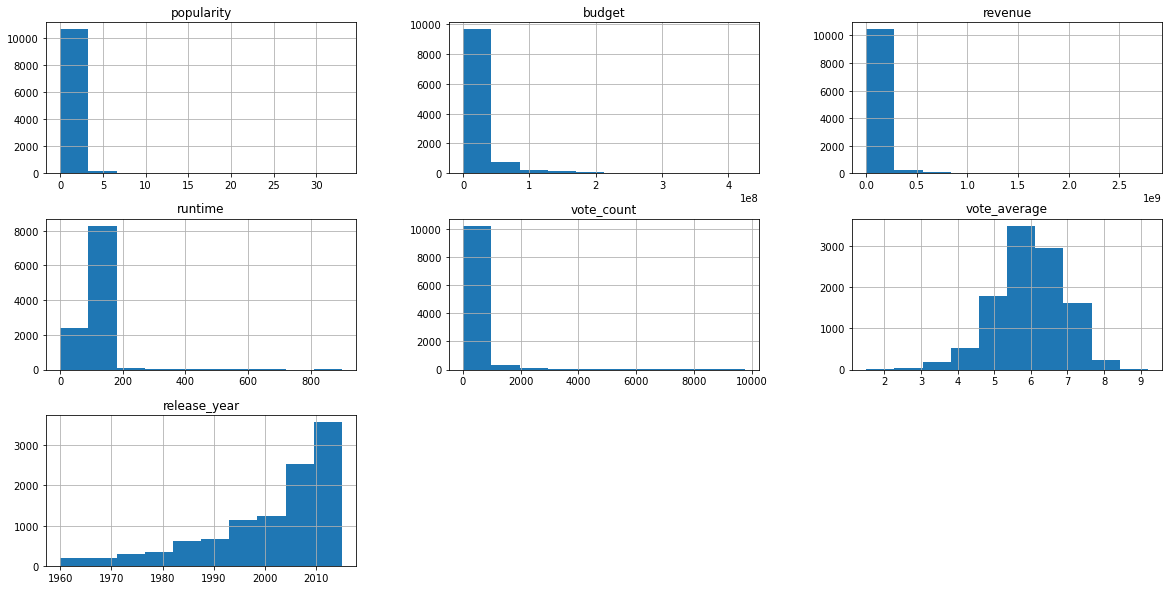

In [14]:
df.hist(figsize=(20,10));

### 1. Which years have highest and lowest movie releases? Compare the average votes in these years.

**According to histogram above , it looks like the highest movie releases is between years 2009-2015. Firstly, lets check the years in 'release_year' column.**

In [15]:
years = df.release_year.unique()
years.sort()
years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

**Our data consists of movies that are released between years 1960 and 2015. Let's check the released movie counts per years.**

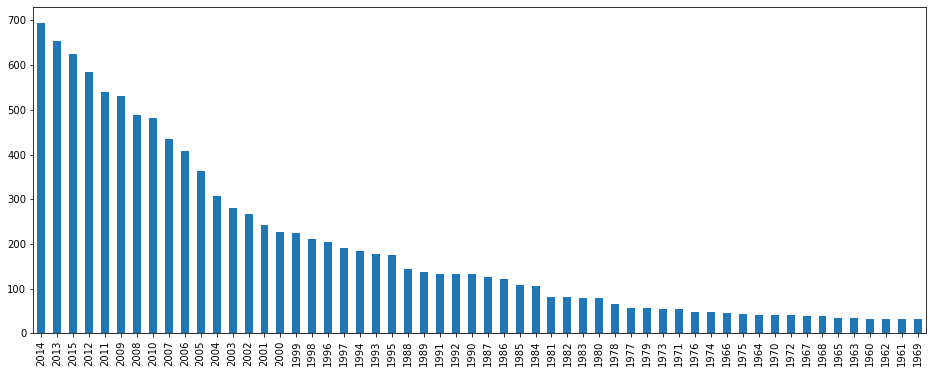

In [16]:
df['release_year'].value_counts()[:].plot(kind='bar', figsize = (16,6));

**Now we can point out the highest and lowest counts for 2014 and 1969.**

In [17]:
rel_max = df['release_year'].value_counts().max()
rel_min = df['release_year'].value_counts().min()
print(rel_max , rel_min)

695 31


**Now we can calculate average votes in these years.**

In [18]:
vote_2014 = df.query('release_year == 2014').vote_average.mean()
vote_1969 = df.query('release_year == 1969').vote_average.mean()

In [19]:
print("The average vote of the year with highest movie realeases is ", vote_2014)
print("The average vote of the year with lowest movie realeases is ", vote_1969)

The average vote of the year with highest movie realeases is  5.915827338129501
The average vote of the year with lowest movie realeases is  5.961290322580646


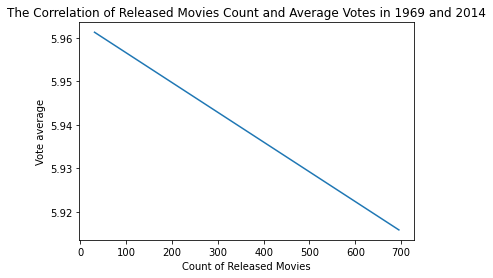

In [20]:
y = [vote_2014,vote_1969]
x = [rel_max, rel_min]
plt.plot(x,y);
plt.xlabel('Count of Released Movies');
plt.ylabel('Vote average');
plt.title('The Correlation of Released Movies Count and Average Votes in 1969 and 2014');

**The amount of released movies are higher in 2014; however, the average votes are higher in 1969. It can be said that there is a negative correlation in years 2014 and 1969.**

**We are comparing the highest and lowest years but it would be better if we also check the wide look around the years for voting.**

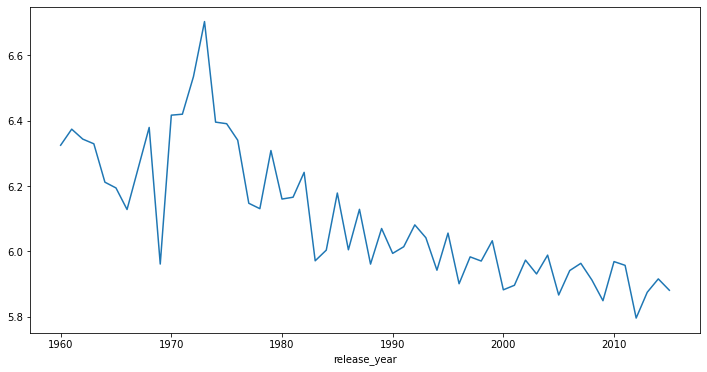

In [21]:
df.groupby('release_year')['vote_average'].mean().plot(figsize=(12,6));

*Except the 1970-1975 period, our findings are matching. Moving average would show a better graph which is suitable with our results but the graph already support our findings.*

### 2. What is the relationship of revenues of movies by their budgets? What are the properties of the movie with highest revenue?

**Let's dive in our data for making some predictions to answer the question.**

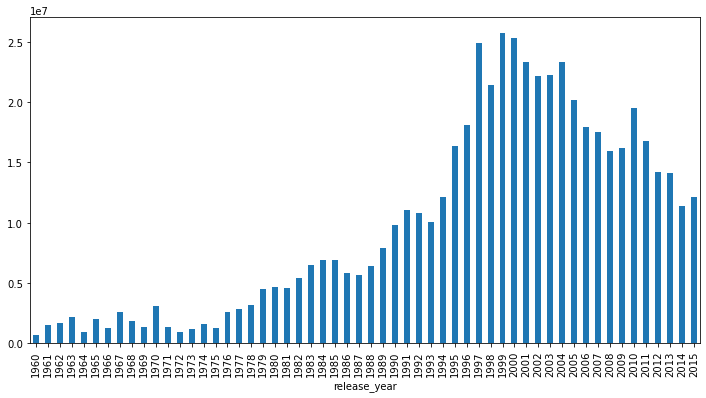

In [22]:
df.groupby('release_year')['budget'].mean().plot(figsize=(12,6), kind='bar');

**In the last decade, the technology in movies improved;furthermore, expenses increased. There might be an issue for the last 10 years in our data.**

In [23]:
df.query('budget == 0')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
30,3.93,0,29355203,Mr. Holmes,Bill Condon,103,425,6.40,2015
36,3.36,0,22354572,Solace,Afonso Poyart,101,474,6.20,2015
72,2.27,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,81,5.50,2015
74,2.17,0,0,Mythica: The Darkspore,Anne K. Black,108,27,5.10,2015
75,2.14,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,569,7.70,2015
...,...,...,...,...,...,...,...,...,...
10860,0.09,0,0,Carry On Screaming!,Gerald Thomas,87,13,7.00,1966
10861,0.08,0,0,The Endless Summer,Bruce Brown,95,11,7.40,1966
10862,0.07,0,0,Grand Prix,John Frankenheimer,176,20,5.70,1966
10863,0.07,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,11,6.50,1966


**With a quick research on web I found out that many of movies with zero budget has an actual budget.**

**There are some missing information in the data. Using mean or a presumptive calculation might cause a false deduction. So I would like to use rows which have budget and revenue columns are different from 0.**

In [24]:
df_gain = df.query('revenue != 0 & budget != 0 ')
df_gain

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.50,2015
1,28.42,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.10,2015
2,13.11,110000000,295238201,Insurgent,Robert Schwentke,119,2480,6.30,2015
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.50,2015
4,9.34,190000000,1506249360,Furious 7,James Wan,137,2947,7.30,2015
...,...,...,...,...,...,...,...,...,...
10822,0.67,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,131,74,7.50,1966
10828,0.40,3000000,13000000,Torn Curtain,Alfred Hitchcock,128,46,6.30,1966
10829,0.40,4653000,6000000,El Dorado,Howard Hawks,120,36,6.90,1966
10835,0.30,12000000,20000000,The Sand Pebbles,Robert Wise,182,28,7.00,1966


**Now let's try to check budget per year.**

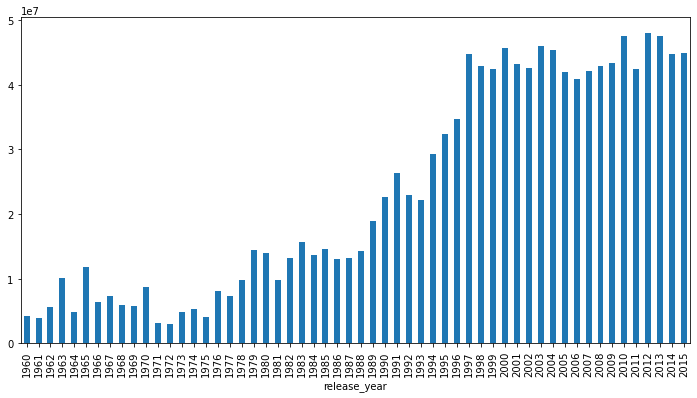

In [25]:
df_gain.groupby('release_year')['budget'].mean().plot(figsize=(12,6), kind = 'bar');

**After the correction we can confirm that there were a lot of missing budget values in the data for the last 10 years. Now it isn't curved to the right.**

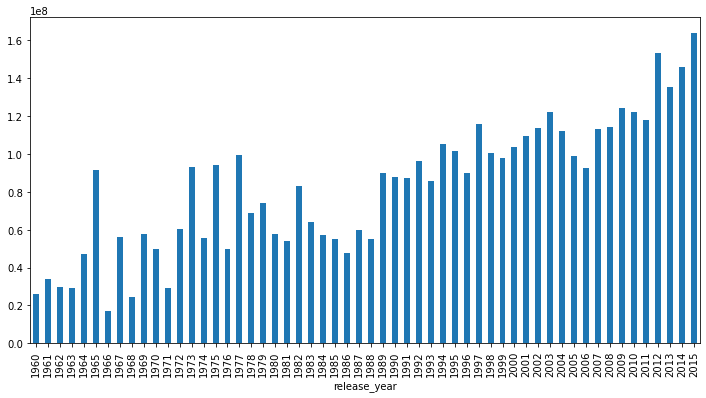

In [26]:
df_gain.groupby('release_year')['revenue'].mean().plot(figsize=(12,6), kind = 'bar');

**We have 2 different graphs but it would be better if we put them in one graph to point out the results.**

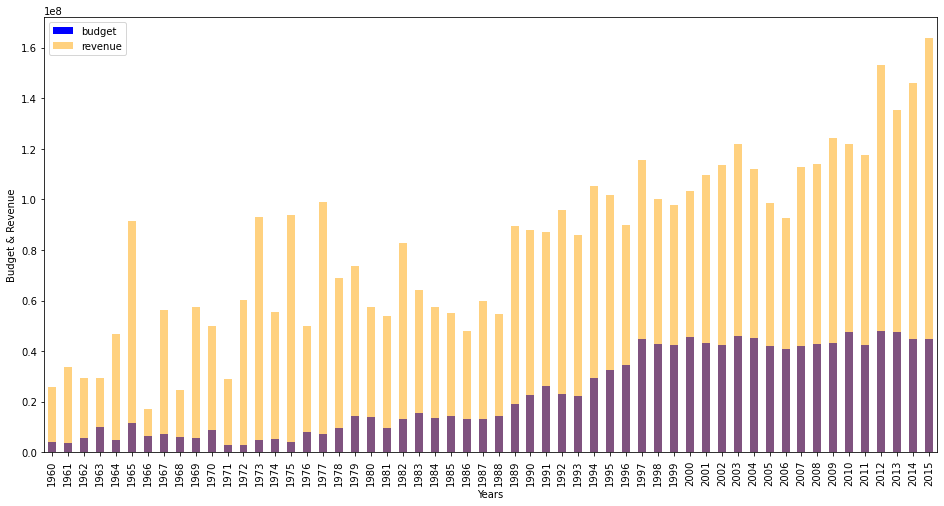

In [27]:
df_gain.groupby('release_year')['budget'].mean().plot(figsize = (16,8),alpha = 1 , kind = 'bar',color = 'blue', label = 'budget')
df_gain.groupby('release_year')['revenue'].mean().plot(figsize = (16,8),alpha = 0.5 , kind = 'bar', color = 'orange', label = 'revenue')
plt.xlabel('Years')
plt.ylabel('Budget & Revenue')
plt.legend();

**It looks like there is a positivite correlation between revenue and budget.**

In [28]:
df.revenue.max()

2781505847

In [29]:
df.query(' revenue == 2781505847 ')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
1386,9.43,237000000,2781505847,Avatar,James Cameron,162,8458,7.10,2009


**In the last 2 cells, we determined the movie with a highest revenue which is Avatar. Let's make a brief from our findings.**

<a id='conclusions'></a>
## Conclusions

The amount of released movies in ***2014*** is ***695*** movie. It is ***31*** movie in ***1969***.

The average vote of the year with highest movie releases (***2014***) is  ***5.92***, lowest movie releases (***1969***) is  ***5.96***.

There is a positive correlation between budget and revenue.

Avatar has the highest revenue (***2.781.505.847 $***). The director of the movie is James Cameron. It is released on ***2009*** and the vote average is ***7.10***.

<a id='limitations'></a>
## Limitations

***This study has some limitations.***

**1.** Around 7k rows from raw data hasn't any value on budget/revenue cells. Using mean or a presumptive calculation to fill these cells might lead a false deduction.Only the rows which have revenue and budget used to overcome this difficulty and to get a precise result;however, results may change in the completed data.

**2.** There are some missing director names in the columns. Because of these missing names, director rates weren't calculated and presented. Directors have a leading role for the creation of a popular, high revenue and rated movies.

## References

*https://stackoverflow.com/questions/4018167/how-to-set-number-of-digits-for-float-point-output-in-ipython/6439856*

*www.udacity.com*
